In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241221_141940.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241221_141940.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0           109    20482  1.734787e+09 -0.045244 -0.098782  0.270750   
 1           133    20531  1.734787e+09 -0.038133 -0.101700  0.268663   
 2           134    20534  1.734787e+09 -0.037668 -0.102076  0.268476   
 3           136    20539  1.734787e+09 -0.036823 -0.102454  0.268247   
 4           145    20560  1.734787e+09 -0.050521 -0.027970  0.166969   
 ...         ...      ...           ...       ...       ...       ...   
 9114194  105641  7828752  1.734866e+09  0.217767  0.050995  0.003136   
 9114195  105641  7828753  1.734866e+09  0.217683  0.050979  0.003058   
 9114196  105641  7828754  1.734866e+09  0.217687  0.051000  0.003058   
 9114197  105641  7828755  1.734866e+09  0.217699  0.050966  0.003030   
 9114198  105641  7828756  1.734866e+09  0.217724  0.050952  0.003022   
 
              xvel      yvel      zvel       P00       P01       P02       P11  \
 0       -3.113950 -1.584241  2.063638  

In [4]:
data = extract_stimulus_centered_data(df,csvs["opto"])

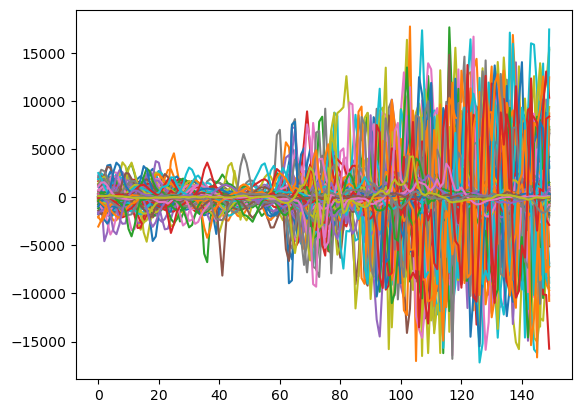

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

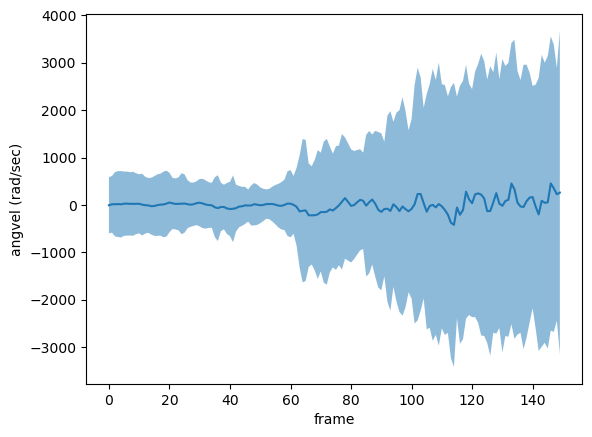

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

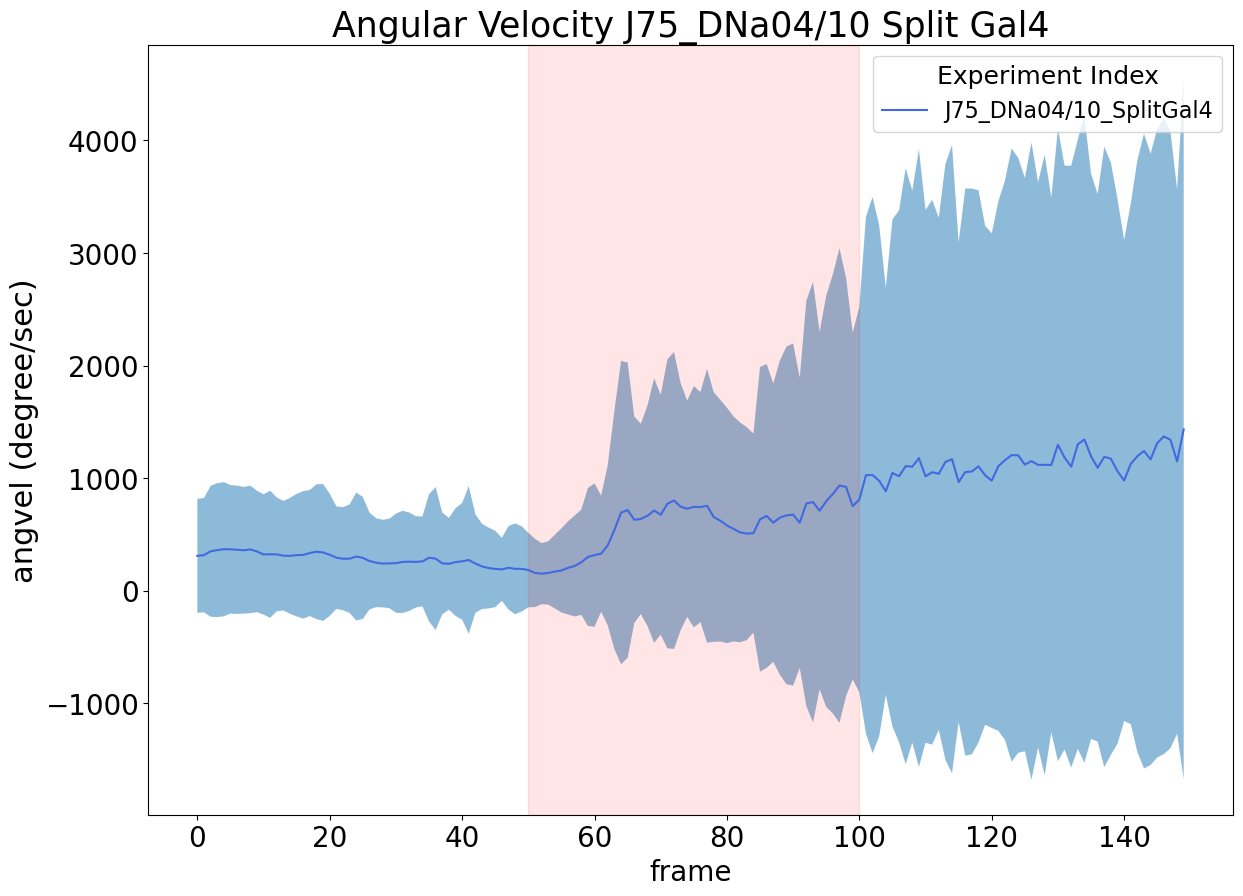

In [8]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='J75_DNa04/10_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 100, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J75_DNa04/10 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
